Matplotlib Formatting Charts


Load the data.


In [1]:
# Import libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In our last example we actually merged two DataFrames: `df_skills_count_DA` and `df_skills_count_SDA` to get the total skill counts for Data Analyst and Senior Data Analyst roles. But what if we wanted to compare and graph the job skills for Data Analyst vs. Senior Data Analyst roles? We'll actually use something called subplots.


Subplots

Notes

- `subplots()`: Create multiple plots within a single figure.
- Returns two objects:
  1. `fig` - represents the entire figure window that will contain all the subplots.
  2. `ax` - either a single axis object (for a single subplot) or an array of axis objects (for multiple subplots).
- Arguments:
  - `nrows` and `ncols` determine the number of rows and columns of subplots, respectively.
  - `sharex` and `sharey` control whether the x-axes or y-axes should be shared among subplots.
- Syntax: `fig, ax = plt.subplots(nrows, ncols)`
- E.g. `fig, ax = plt.subplots(1,2)` - Creates a figure with 1 row and 2 columns of subplots.


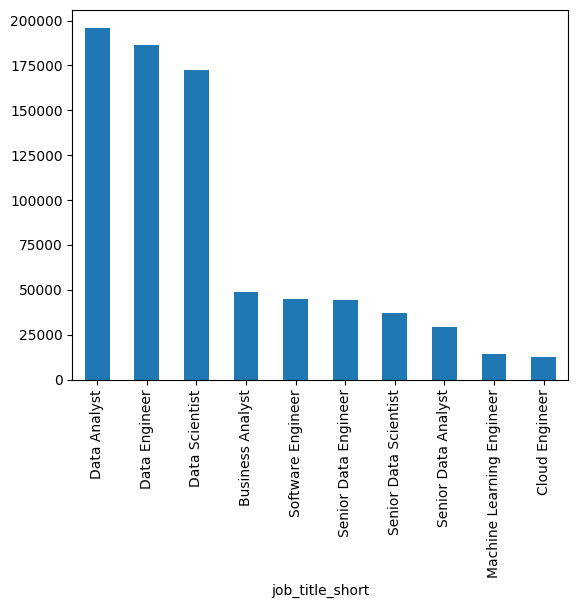

In [2]:
# create a simple subplot
fig, ax = plt.subplots()

# plot the data
df.job_title_short.value_counts().plot(kind='bar', ax=ax)
plt.show()

Let's add two plot


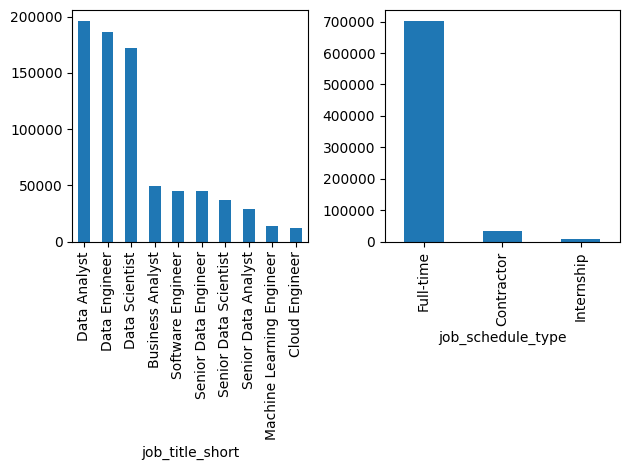

In [3]:
fig, ax = plt.subplots(1, 2)

df.job_title_short.value_counts().plot(kind='bar', ax=ax[0])
df.job_schedule_type.value_counts().head(3).plot(kind='bar', ax=ax[1])

# fix the overlap
fig.tight_layout()

plt.show()


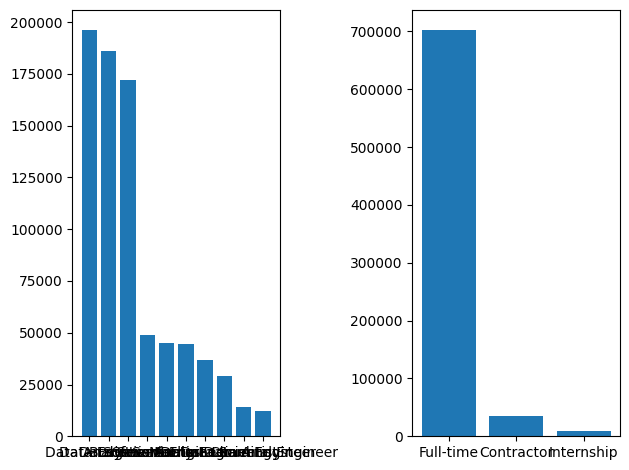

In [4]:
fig, ax = plt.subplots(1, 2)

ax[0].bar(df['job_title_short'].value_counts().index, df['job_title_short'].value_counts())

ax[1].bar(df['job_schedule_type'].value_counts().head(3).index, df['job_schedule_type'].value_counts().head(3))

fig.tight_layout()

plt.show()

Examples

Create a subplot that displays individual bar charts for each `job_title_short` from the DataFrame we created in `11_Pandas_Explode`.

Note: This DataFrame.

Here's the code from our last exercise:


In [5]:
df_skills = df.copy()
df_skills = df_skills.explode('job_skills')
skills_count = df_skills.groupby(['job_skills', 'job_title_short']).size()
df_skills_count = skills_count.reset_index(name='skill_count')
df_skills_count.sort_values(by='skill_count', ascending=False, inplace=True)

df_skills_count

,job_skills,job_title_short,skill_count
1480,python,Data Scientist,113711
1822,sql,Data Engineer,113130
1479,python,Data Engineer,108022
1821,sql,Data Analyst,92428
1823,sql,Data Scientist,78982
...,...,...,...
2173,webex,Senior Data Scientist,1
1054,mattermost,Data Scientist,1
270,clickup,Machine Learning Engineer,1
797,heroku,Senior Data Analyst,1


Get the top 3 job titles.


In [6]:
job_titles = df_skills_count['job_title_short'].unique().tolist()

job_titles = job_titles[:3]

job_titles

['Data Scientist', 'Data Engineer', 'Data Analyst']

plot these top jobs on the same plot.


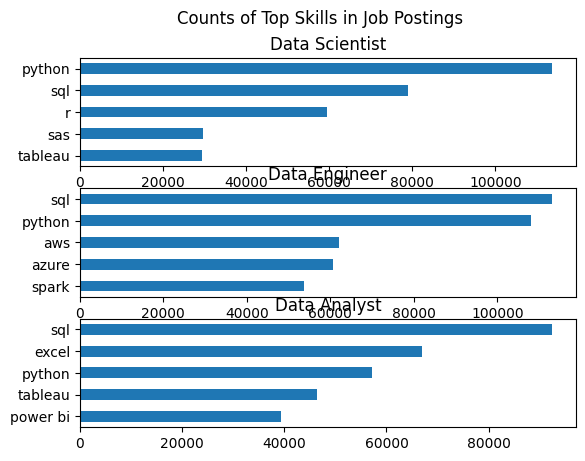

In [7]:
fig, ax = plt.subplots(len(job_titles), 1)

for i, job_title in enumerate(job_titles):
    df_plot = df_skills_count[df_skills_count['job_title_short'] == job_title].head(5)
    df_plot.plot(kind='barh', x='job_skills', y='skill_count', ax=ax[i], title=job_title)
    ax[i].invert_yaxis()
    ax[i].set_ylabel('')
    ax[i].legend().set_visible(False)

fig.suptitle('Counts of Top Skills in Job Postings', fontsize=12)
plt.show()

Looking at our graphs there's some overlap between the two. To make it cleaner we're going to use `tight_layout()`.


Tight Layout

Notes

- `tight_layout()`: automatically adjusts the spacing between subplots and the figure margins to prevent overlapping of axes labels, titles, and tick labels.

Examples

We're taking the same visualization as before but adding in `tight_layout()` to so the subplots fit in the figure area.


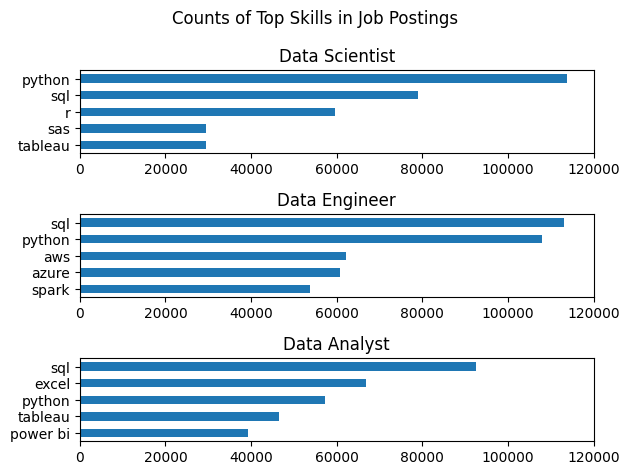

In [8]:
fig, ax = plt.subplots(len(job_titles), 1)

for i, job_title in enumerate(job_titles):
    df_plot = df_skills_count[df_skills_count['job_title_short'] == job_title].head(5)
    df_plot.plot(kind='barh', x='job_skills', y='skill_count', ax=ax[i], title=job_title)
    ax[i].invert_yaxis()
    ax[i].set_ylabel('')
    ax[i].legend().remove()
    ax[i].set_xlim(0, 120_000)

fig.suptitle('Counts of Top Skills in Job Postings', fontsize=12)
fig.tight_layout()
plt.show()

Generating Plots for Video Intro


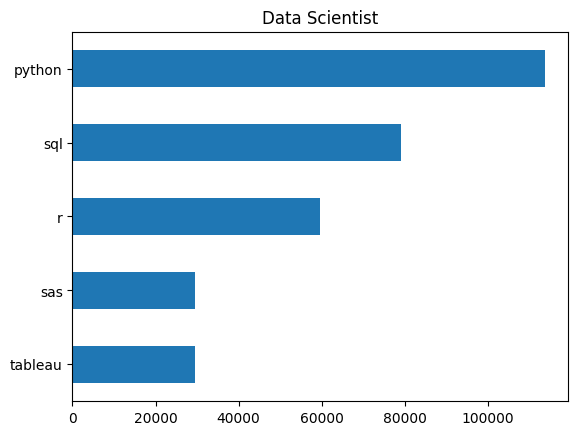

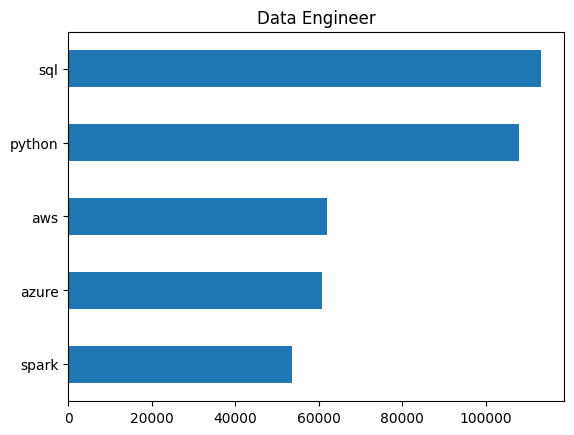

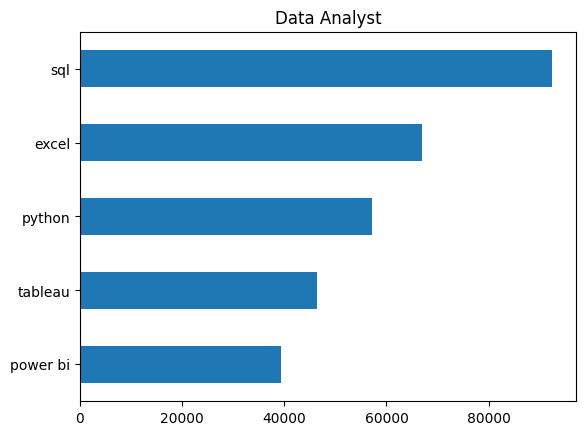

In [9]:
for i, job_title in enumerate(job_titles):
    df_skills_count[df_skills_count['job_title_short'] == job_title].head(5).plot(kind='barh', x='job_skills', y='skill_count', title=job_title)
    plt.gca().invert_yaxis()
    plt.gca().set_ylabel('')
    plt.gca().get_legend().remove()
    plt.show()

Savefig

Notes

- `savefig()`: Save the current figure.

Examples

Save this subplot as `top_demanded_DA_and_SDA_skills` in the same file path as this notebook.


In [10]:
# Save the fig as a png file
# plt.savefig('top_skills.png')
# plt.show()